Index(['start_time', 'audusd | tick_count (Winsorized 0.00-0.99)',
       'audusd | open', 'audusd | high', 'audusd | low', 'audusd | close',
       'audusd | mean', 'audusd | spread (Winsorized 0.00-0.99)',
       'audusd | volume (Winsorized 0.00-0.99)',
       'audusd | volatility (Winsorized 0.00-0.99)', 'audusd | vwap',
       'audusd | ofi', 'eurusd | tick_count (Winsorized 0.00-0.99)',
       'eurusd | open', 'eurusd | high', 'eurusd | low', 'eurusd | close',
       'eurusd | mean', 'eurusd | spread (Winsorized 0.00-0.99)',
       'eurusd | volume (Winsorized 0.00-0.99)',
       'eurusd | volatility (Winsorized 0.00-0.99)', 'eurusd | vwap',
       'eurusd | ofi',
       'audusd | tick_count (Winsorized 0.00-0.99)_log_pct_change',
       'audusd | open_log_pct_change', 'audusd | high_log_pct_change',
       'audusd | low_log_pct_change', 'audusd | close_log_pct_change',
       'audusd | mean_log_pct_change',
       'audusd | spread (Winsorized 0.00-0.99)_log_pct_change',
       '

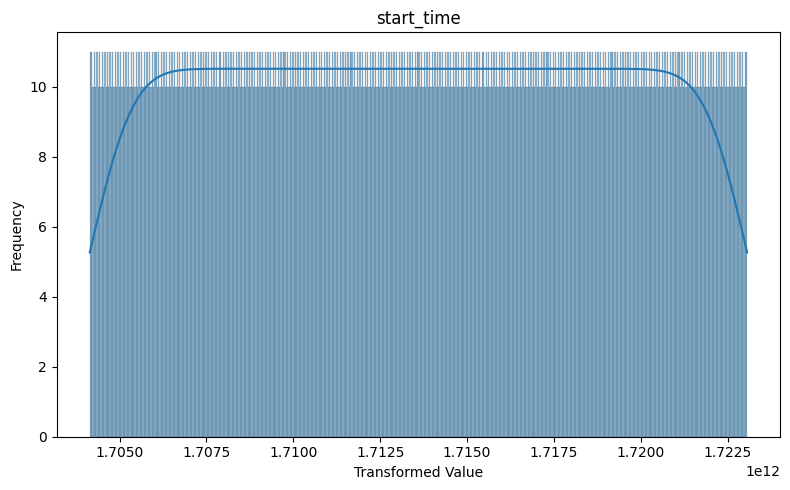

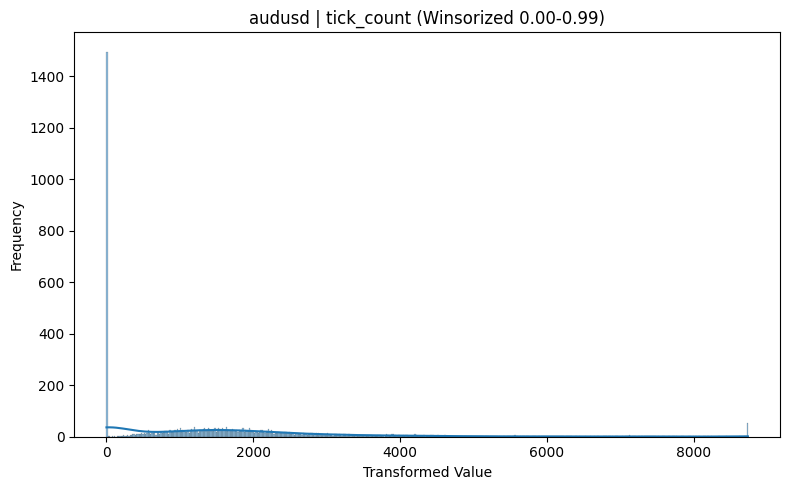

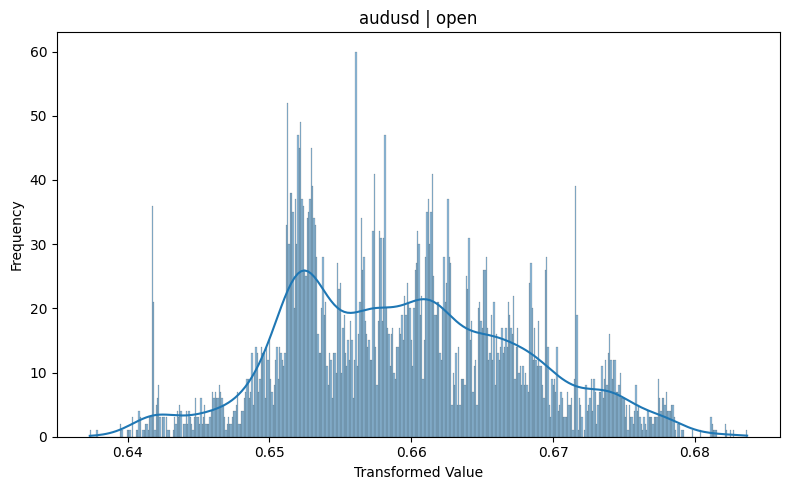

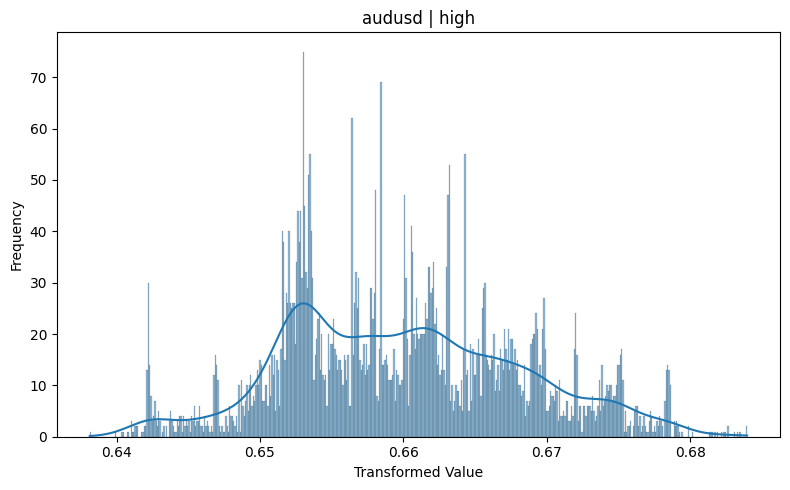

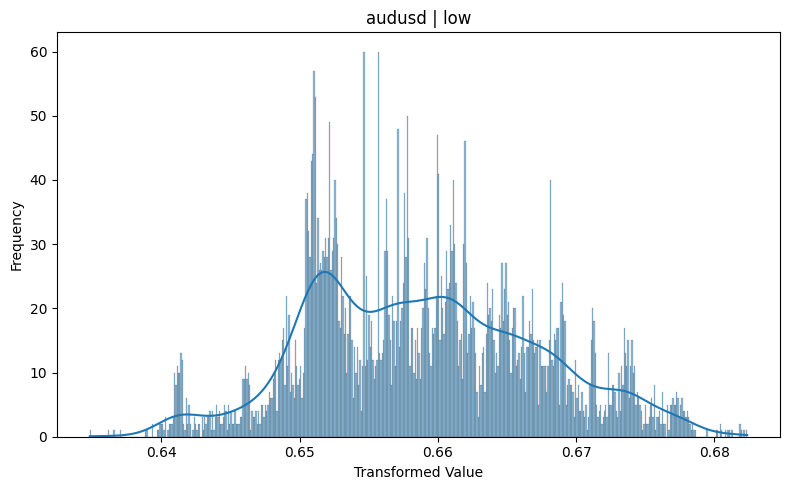

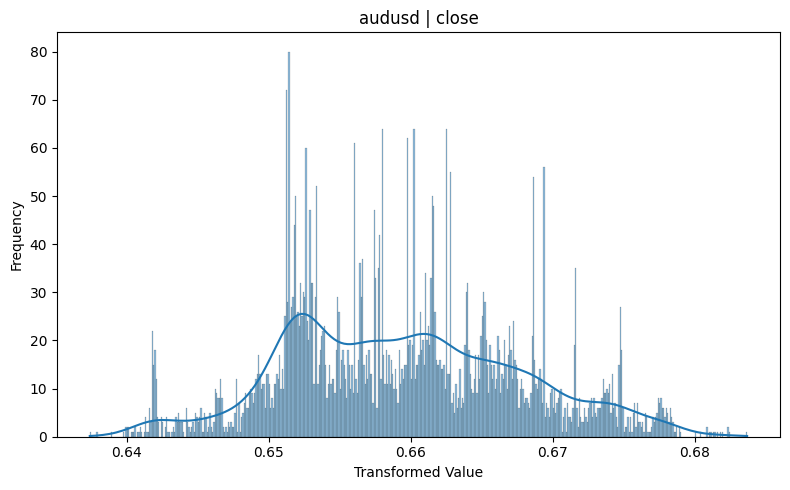

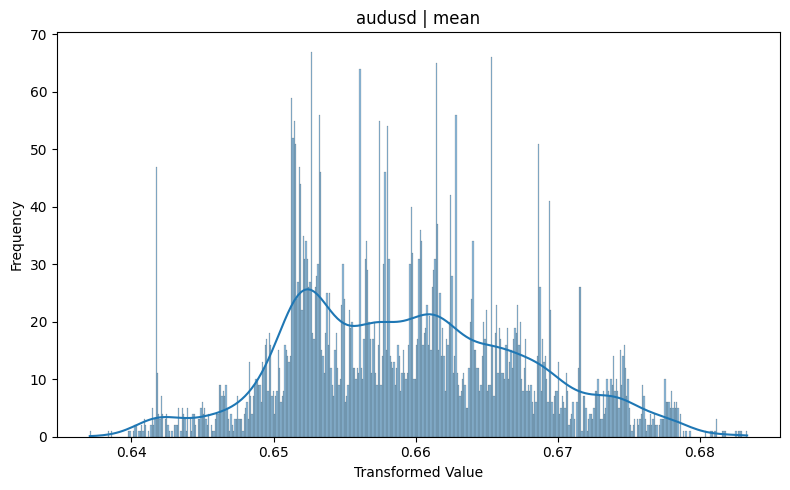

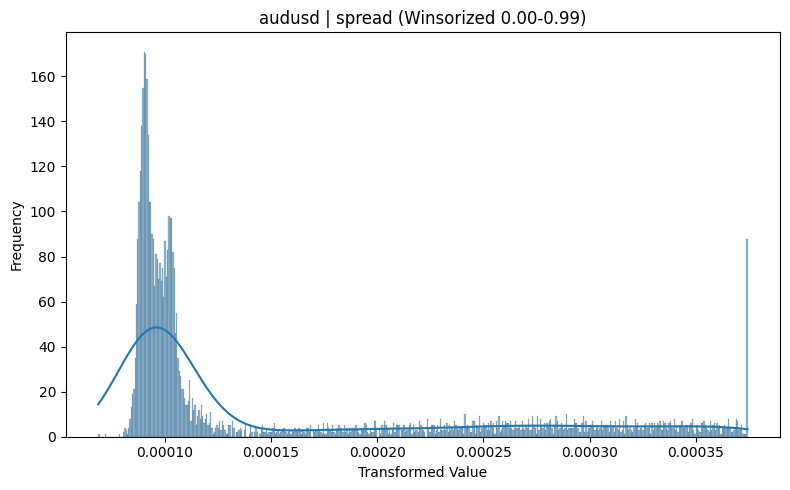

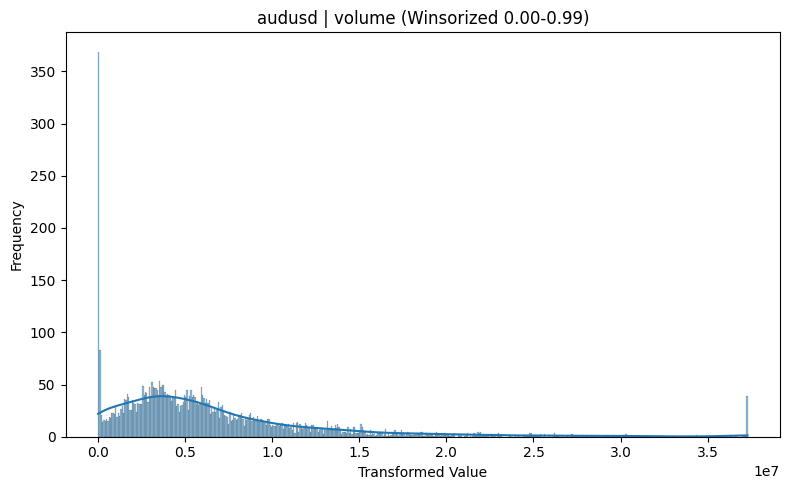

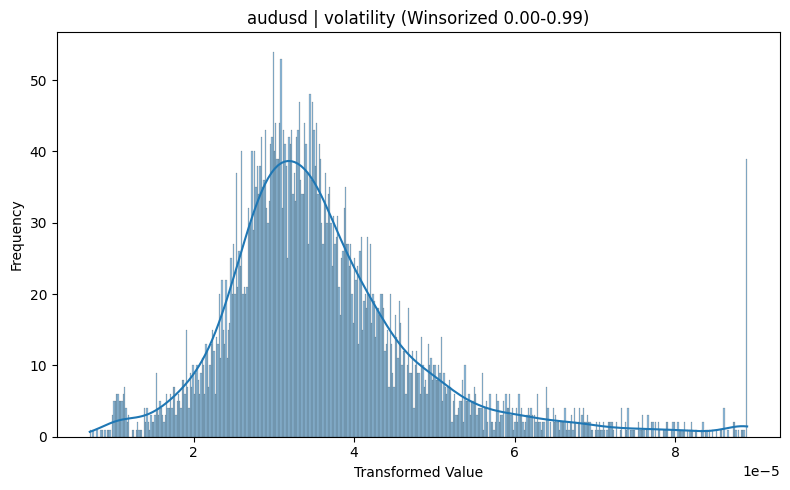

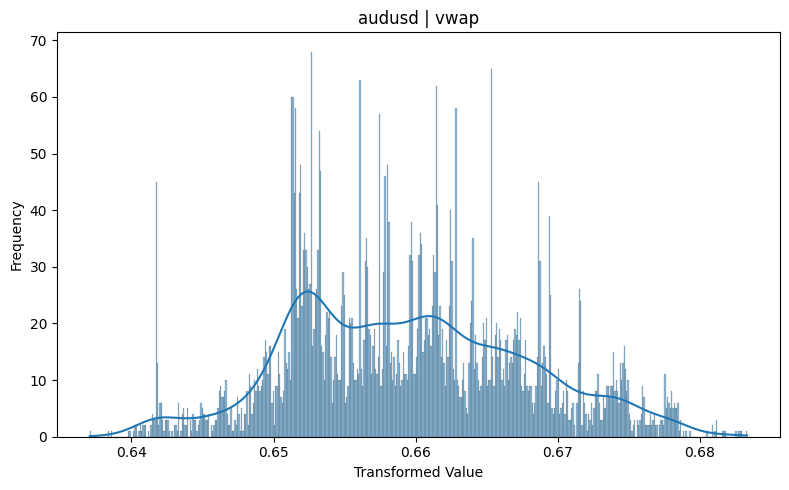

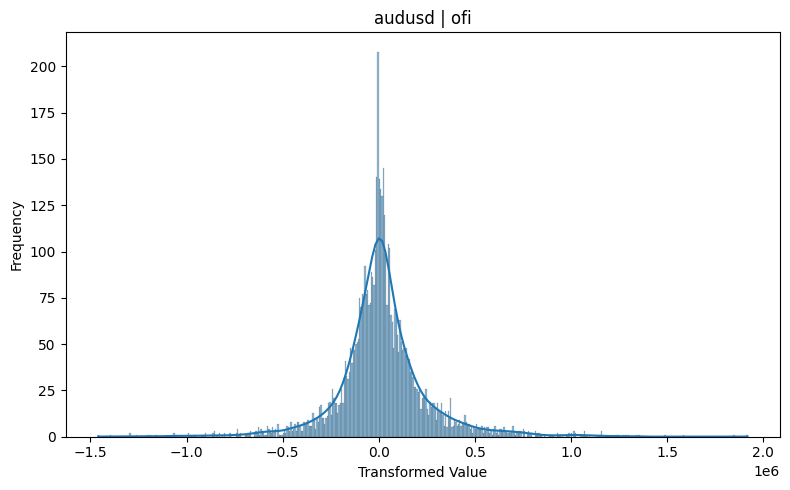

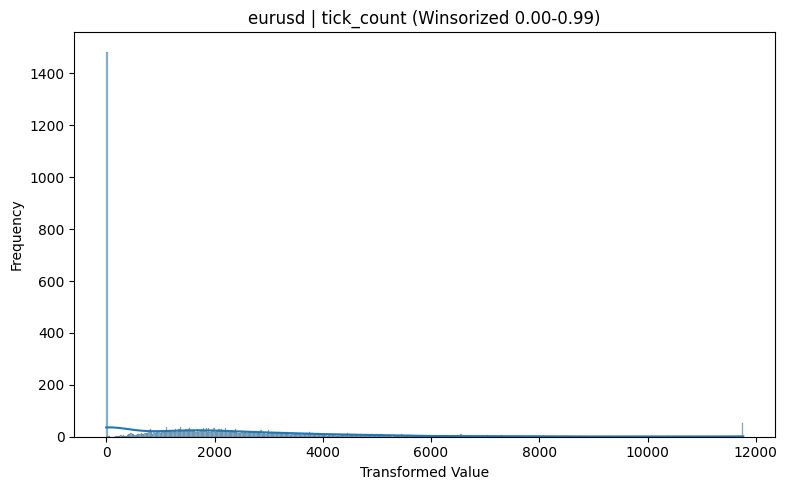

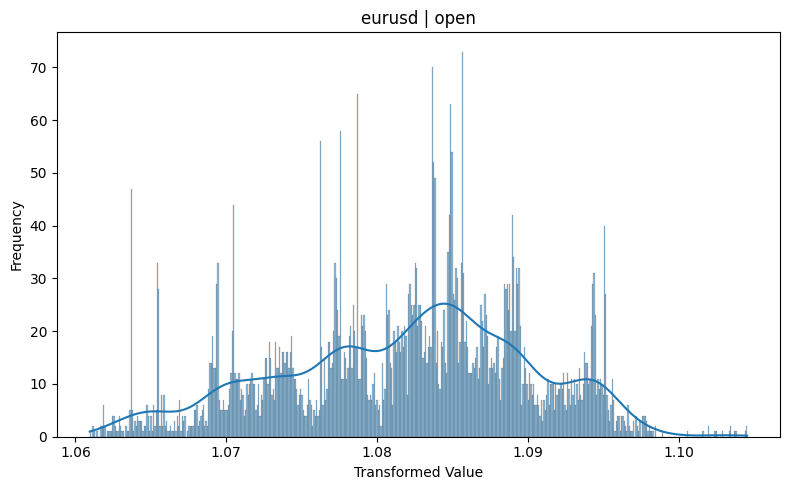

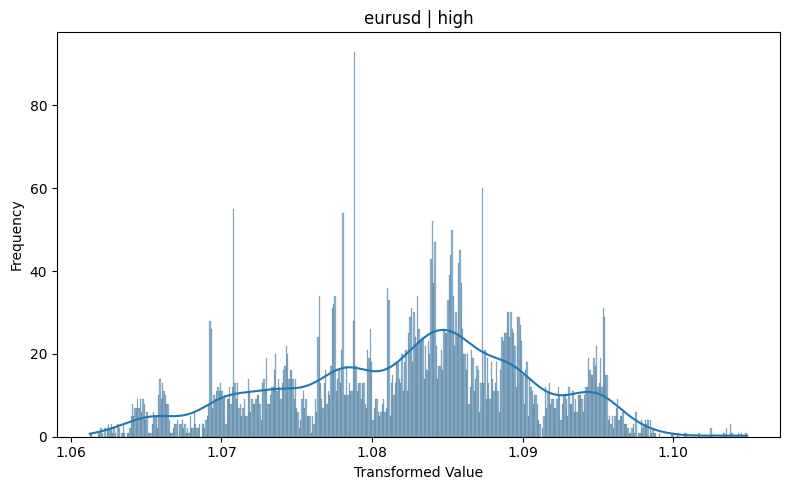

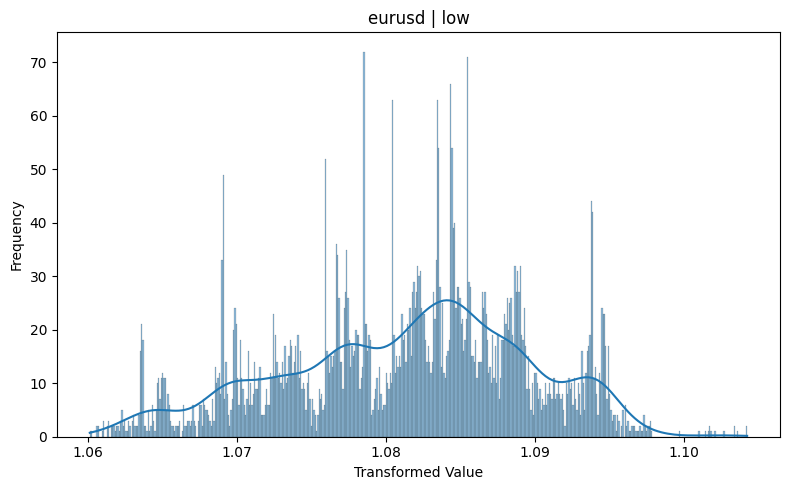

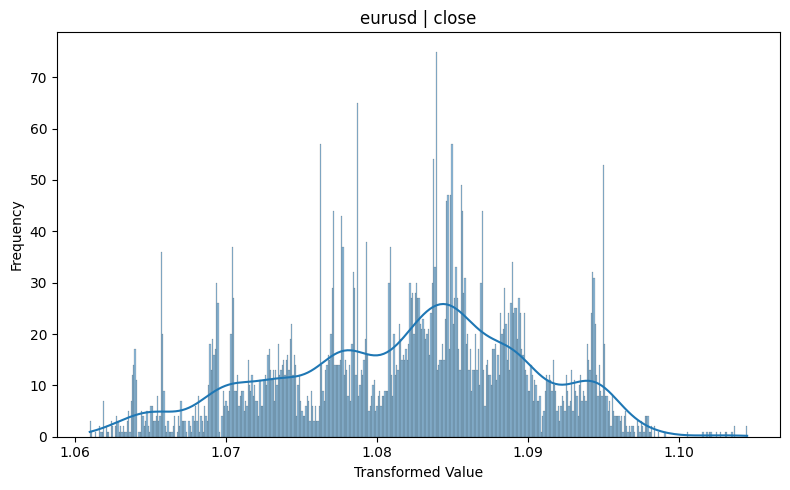

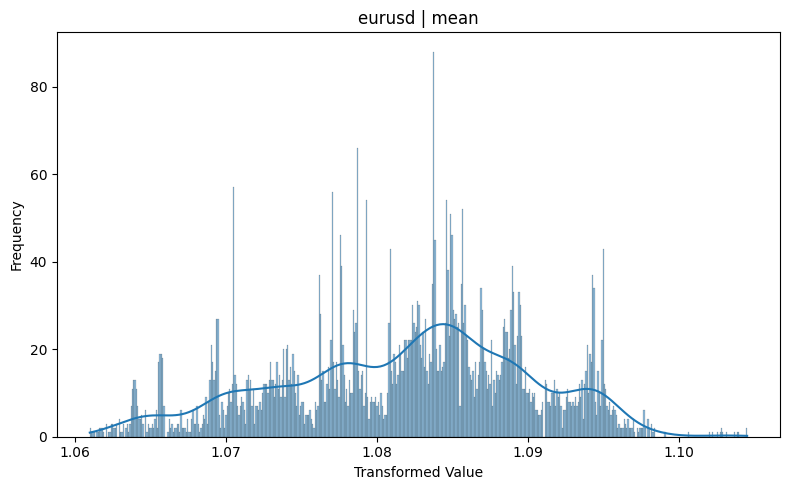

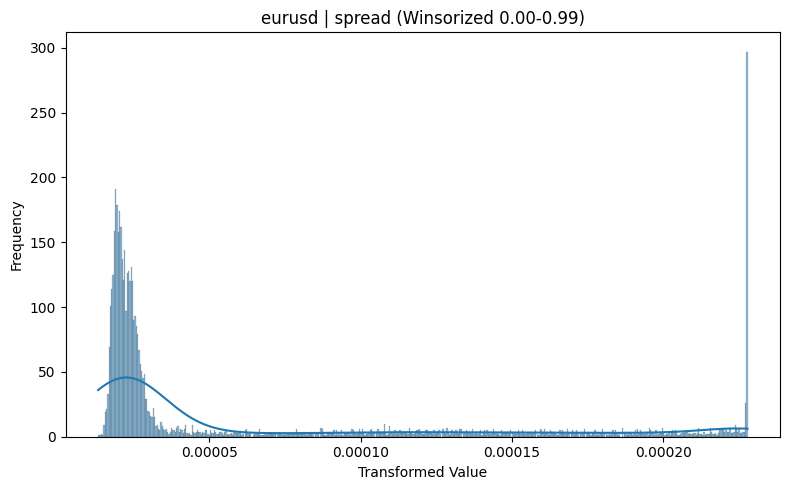

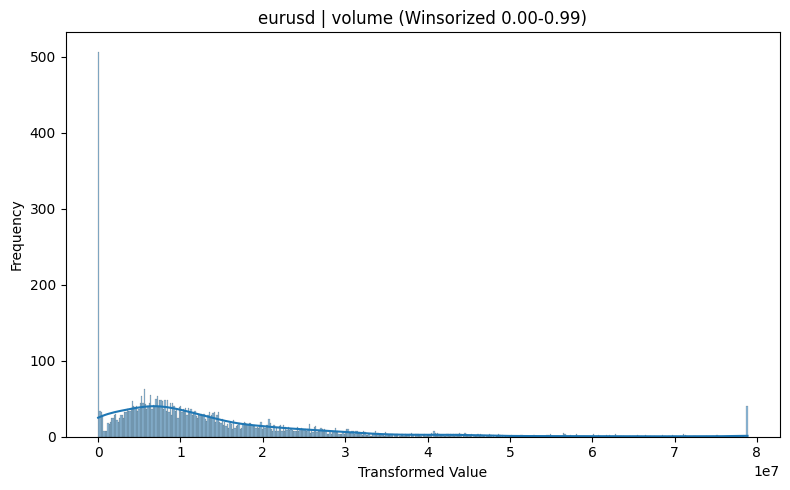

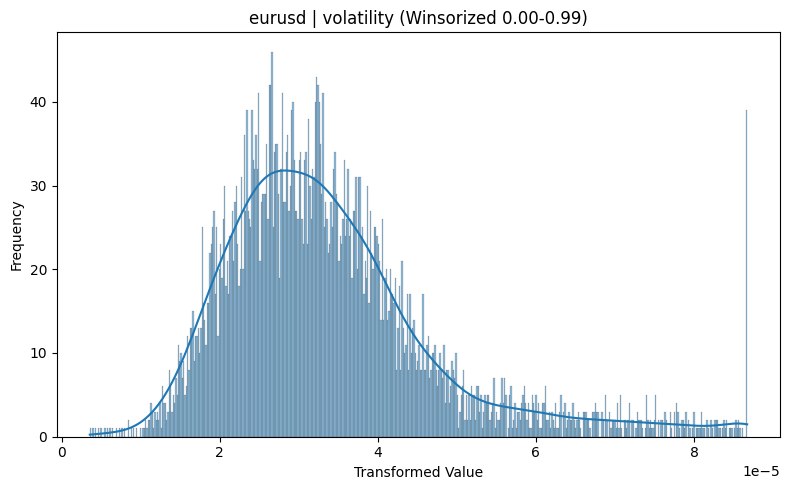

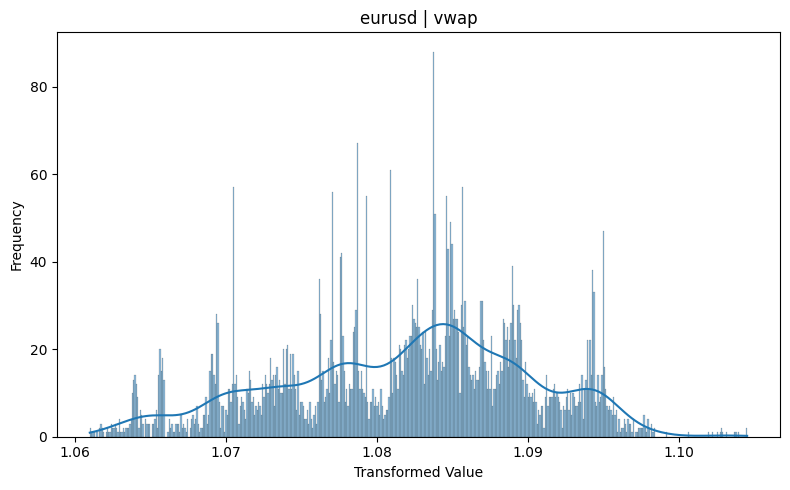

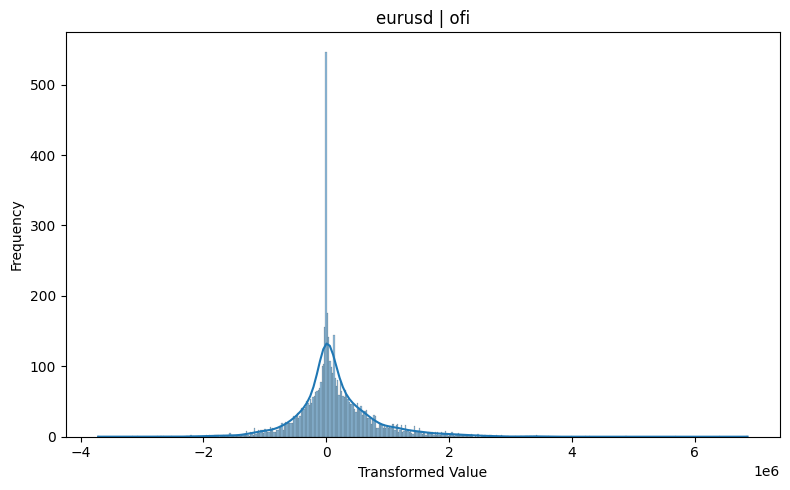

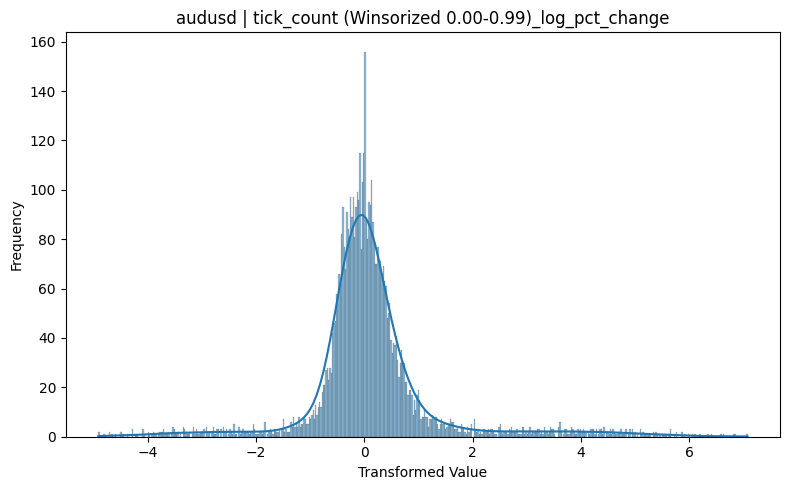

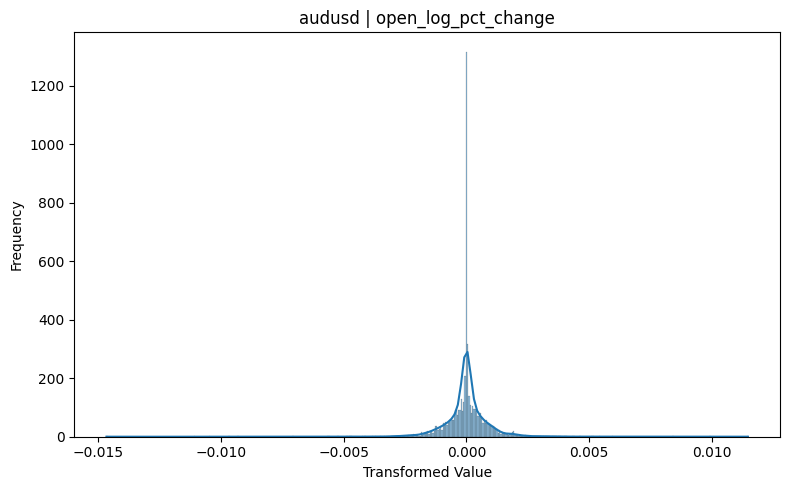

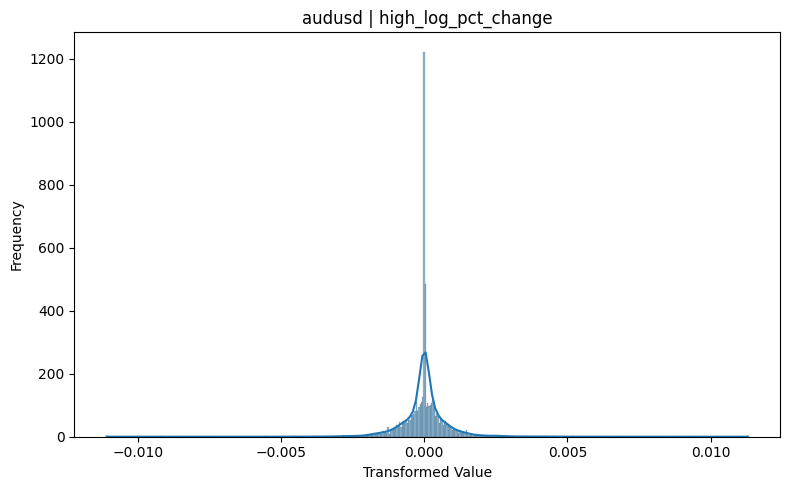

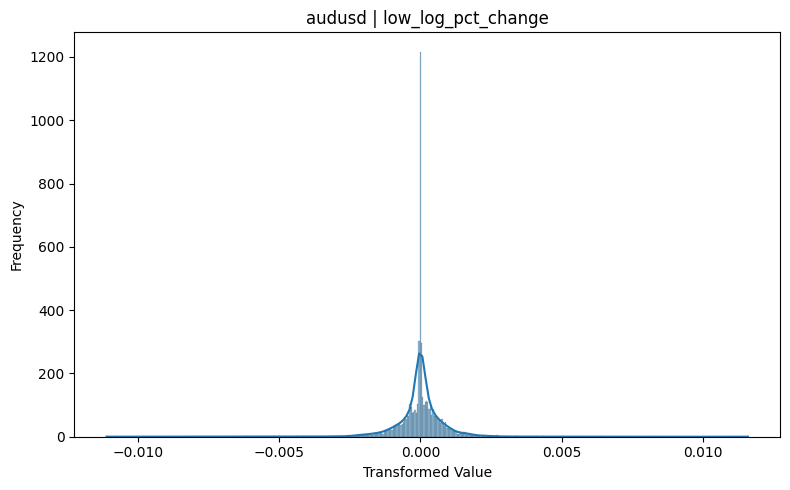

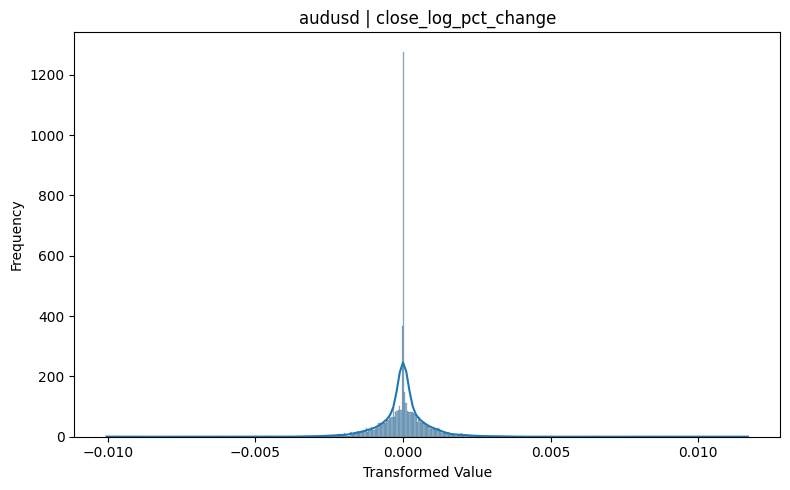

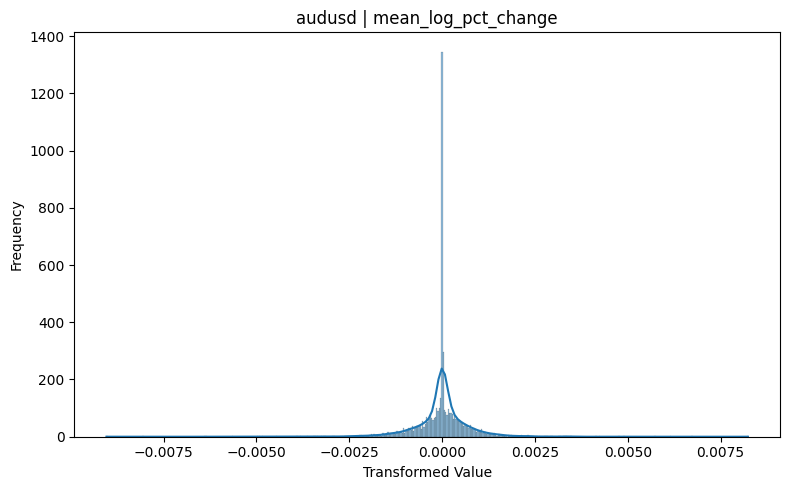

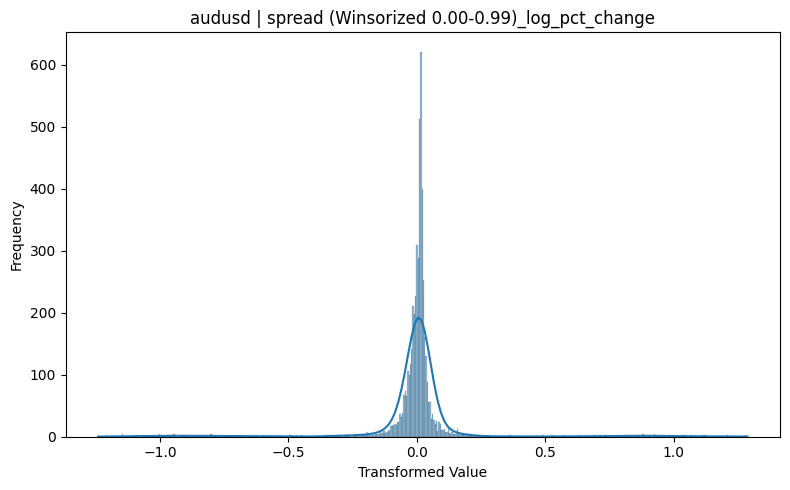

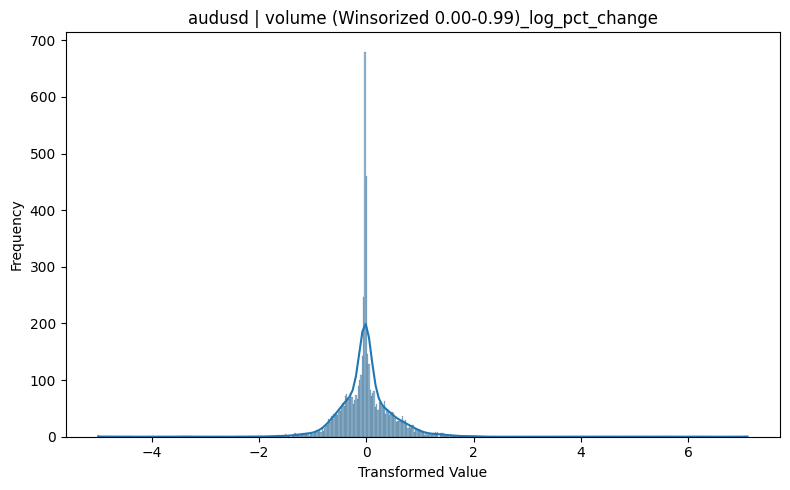

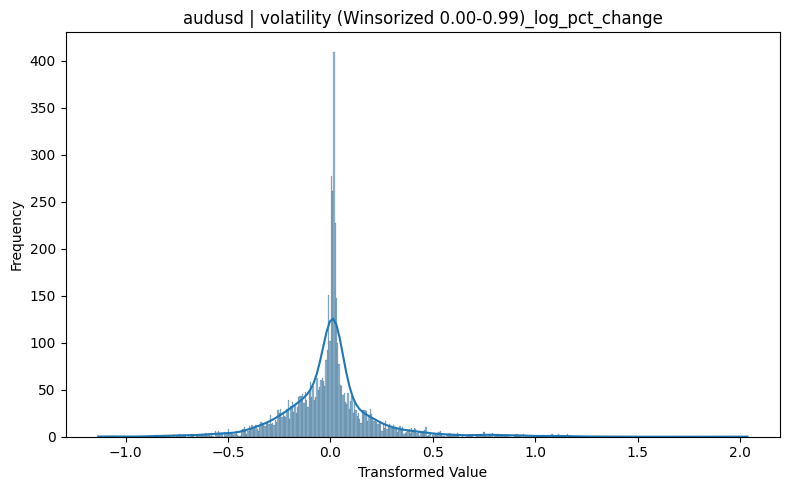

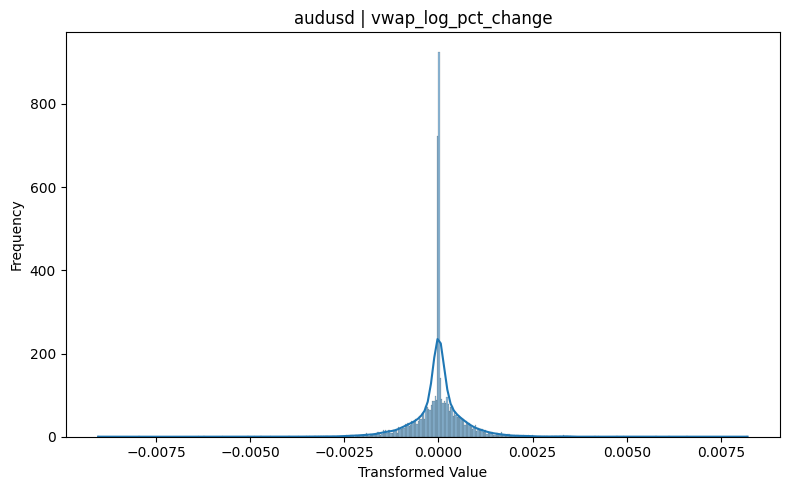

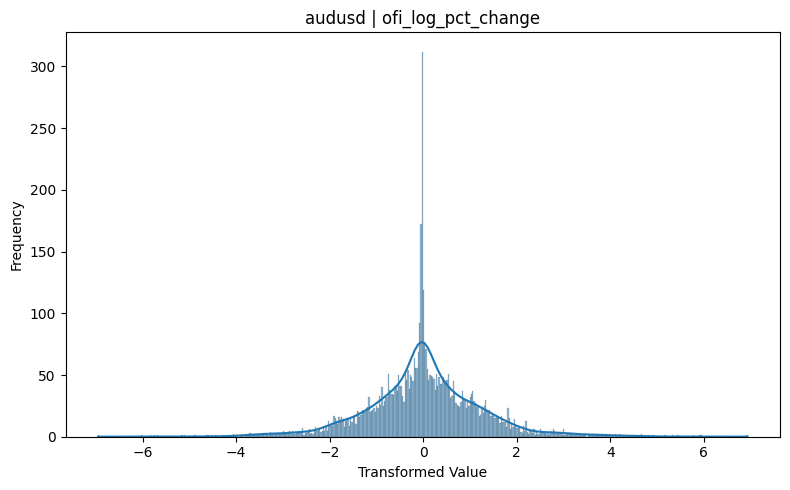

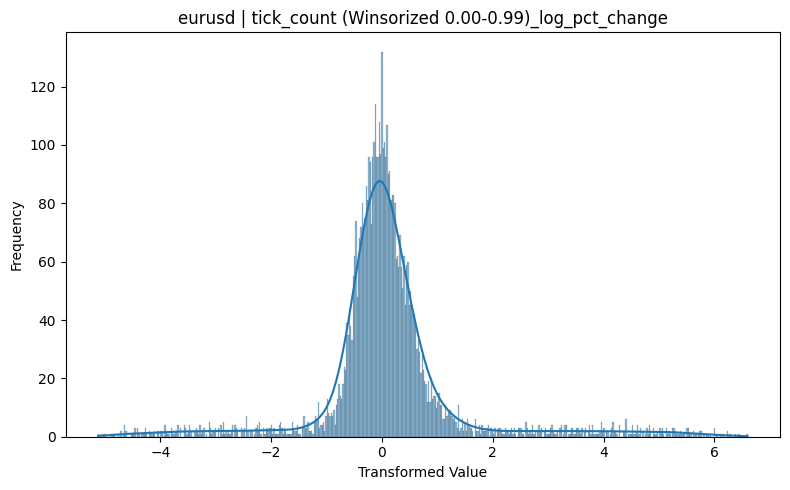

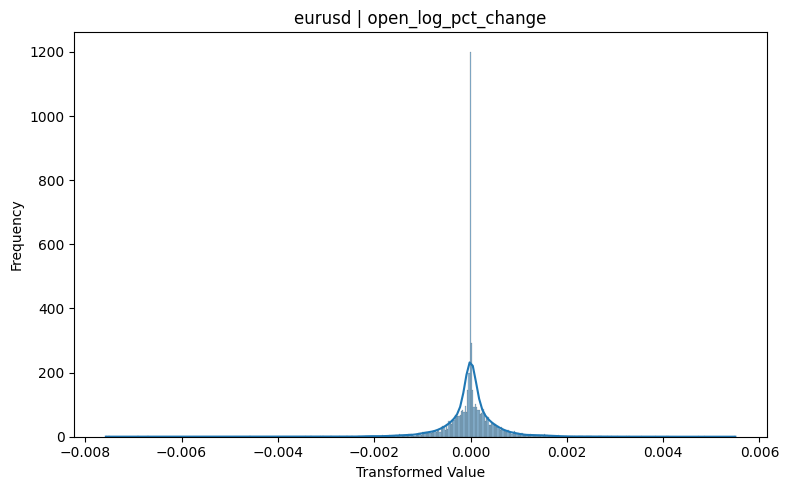

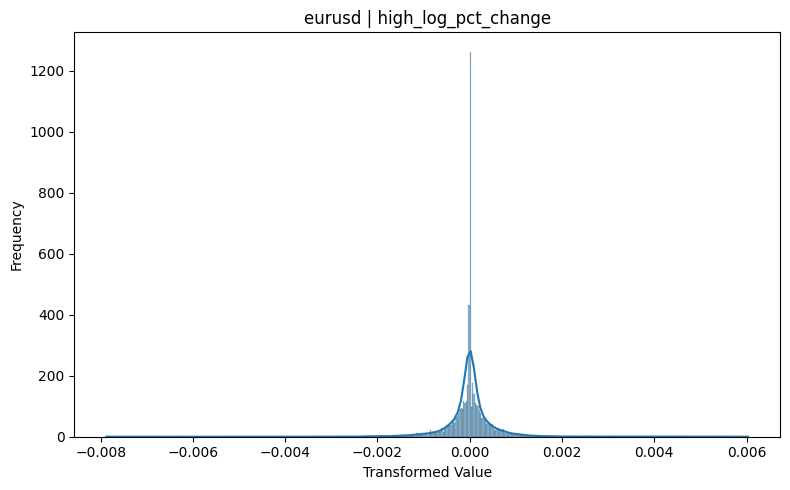

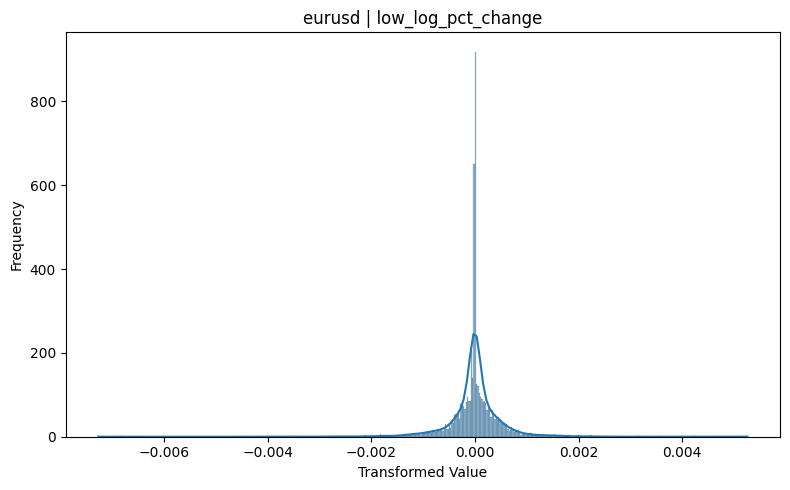

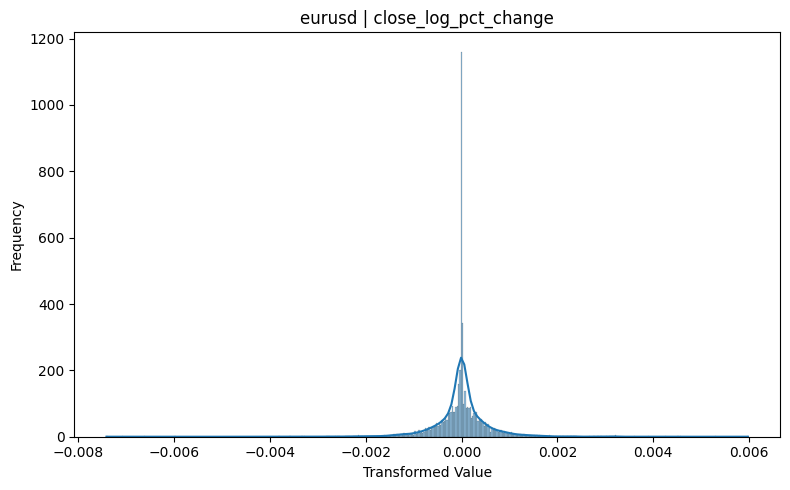

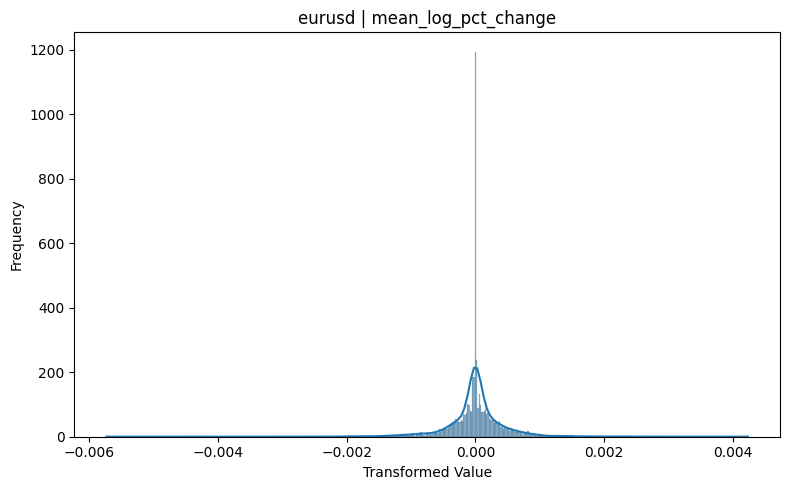

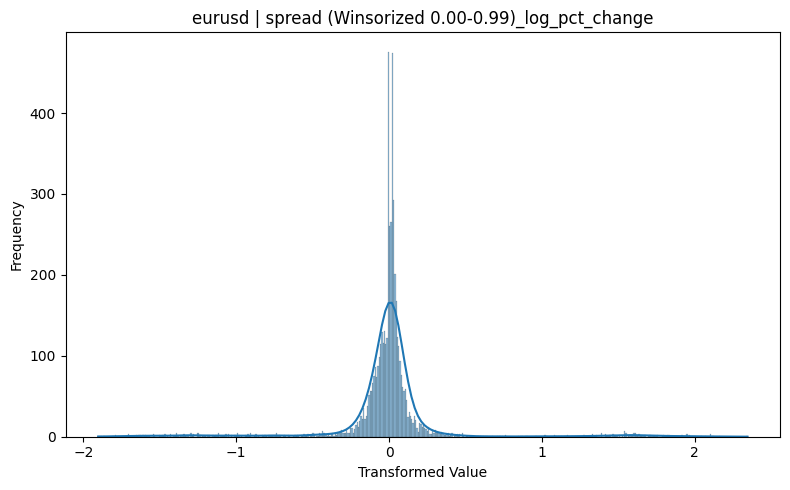

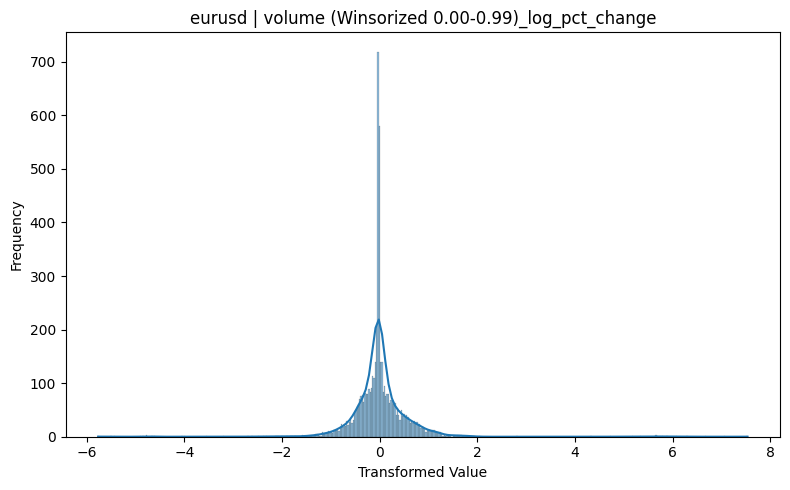

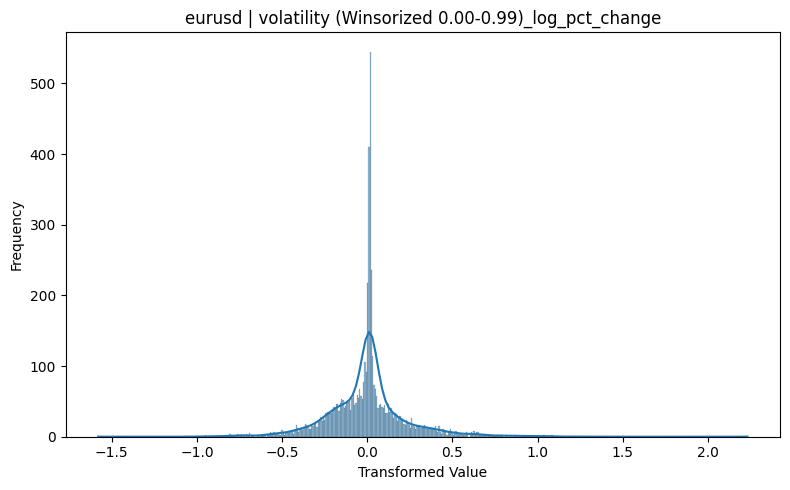

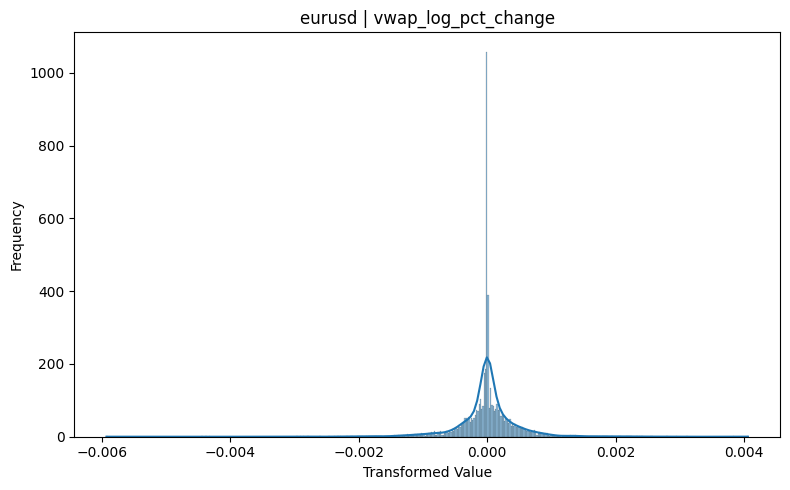

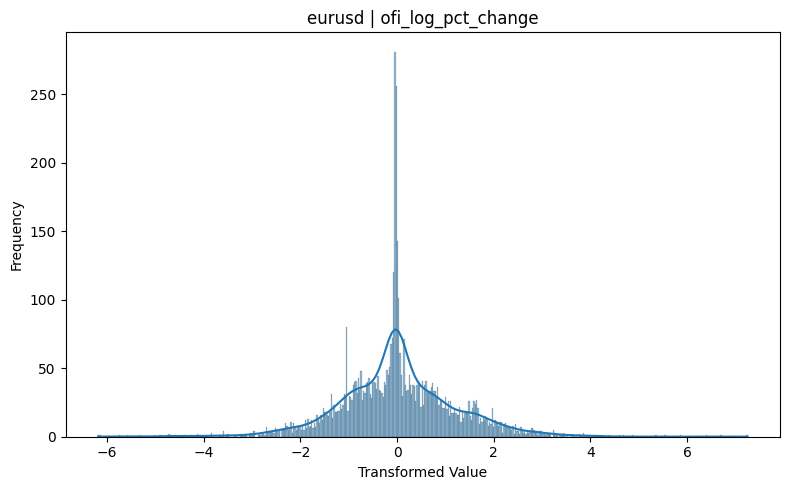

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your data
df = pd.read_parquet("data/1H_forex_data_train.parquet")

def winsorize_fit_transform(data, thres=0.95):
    """
    Compute winsorization thresholds from data using a symmetric threshold 
    (e.g., 0.95 keeps central 95% of values), and apply winsorization.

    Parameters
    ----------
    data : np.ndarray or pd.DataFrame
        Input data (2D: shape [n_samples, n_features]).
    thres : float
        Symmetric winsorization threshold between 0 and 1 (e.g. 0.95).

    Returns
    -------
    bounds : tuple of np.ndarray
        (lower_bounds, upper_bounds), each of shape (n_features,)
    transformed_data : np.ndarray or pd.DataFrame
        Winsorized data (same type and shape as input).
    """
    if not (0 < thres < 1):
        raise ValueError("thres must be between 0 and 1")

    # Convert to NumPy array if it's a DataFrame
    is_dataframe = isinstance(data, pd.DataFrame)
    X = data.values if is_dataframe else np.asarray(data)
    columns = data.columns if is_dataframe else None

    lower_pct = (1 - thres) / 2 * 100
    upper_pct = (1 + thres) / 2 * 100

    lower_bounds = np.percentile(X, lower_pct, axis=0)
    upper_bounds = np.percentile(X, upper_pct, axis=0)

    X_winsorized = np.clip(X, lower_bounds, upper_bounds)

    if is_dataframe:
        X_winsorized = pd.DataFrame(X_winsorized, columns=columns)

    return (lower_bounds, upper_bounds), X_winsorized

for col in df.columns:
    if not np.issubdtype(df[col].dtype, np.number):
        print(f"Skipping non-numeric column: {col}")
        continue

    # Step 1: Log-diff
    data = df[col]

    # data = np.log(data.replace(0, np.nan))
    # data = data.diff().dropna()

    # if data.empty:
    #     print(f"Column {col} has no valid data after first log-diff.")
    #     continue
    
    # thres = 0.95
    # params, transformed = winsorize_fit_transform(data, thres)

    # Plot
    plt.figure(figsize=(8, 5))
    sns.histplot(data, bins=500, kde=True)
    plt.title(f"{col}")
    plt.xlabel("Transformed Value")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()
